<a href="https://colab.research.google.com/github/bruna-mazera/bruna-mazera/blob/main/git_analise_do_banco_de_dados_Brewers__friend_Beer_Recipes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 23)
dataset = pd.read_csv('/content/recipe_Data.csv', encoding= "ISO-8859-1")


In [3]:
dataset.head(3)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(73861, 23)

In [5]:
faltantes = dataset.isnull().sum()
faltantes_percentual = (dataset.isnull().sum() /len(dataset['StyleID'])) * 100
print(faltantes_percentual)

BeerID            0.000000
Name              0.002708
URL               0.000000
Style             0.806921
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        53.143066
PrimaryTemp      30.681957
PrimingMethod    90.847673
PrimingAmount    93.536508
UserId           68.358132
dtype: float64


In [6]:
dataset['StyleID'].value_counts().loc[lambda x : x>1000]

,count
StyleID,
7,11940
10,7581
134,2617
9,2277
4,2038
30,1753
86,1478
12,1268
92,1204


In [7]:
selecao = dataset.loc[dataset['StyleID'].isin([7, 10, 134, 9, 4, 30, 86, 12, 92, 6, 175, 39])]

In [8]:
selecao.shape

(35424, 23)

In [9]:
selecao.drop('BeerID', axis= 1, inplace = True)
selecao.drop('Name', axis= 1, inplace = True)
selecao.drop('URL', axis= 1, inplace = True)
selecao.drop('Style', axis= 1, inplace = True)
selecao.drop('UserId', axis= 1, inplace = True)
selecao.drop('PrimingMethod', axis= 1, inplace = True)
selecao.drop('PrimingAmount', axis= 1, inplace = True)

<ipython-input-9-cb84047e8416>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao.drop('BeerID', axis= 1, inplace = True)
<ipython-input-9-cb84047e8416>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao.drop('Name', axis= 1, inplace = True)
<ipython-input-9-cb84047e8416>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao.drop('URL', axis= 1, inplace = True)
<ipython-input-9-cb84047e8416>:4: SettingWithCopyWarning: 
A

In [10]:
selecao.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,Specific Gravity,All Grain,1.0,NaN
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,NaN,Specific Gravity,All Grain,NaN,21.11


In [11]:

selecao.dtypes

,0
StyleID,int64
Size(L),float64
OG,float64
FG,float64
ABV,float64
IBU,float64
Color,float64
BoilSize,float64
BoilTime,int64
BoilGravity,float64


In [12]:
selecao['SugarScale'].value_counts()

,count
SugarScale,
Specific Gravity,34605
Plato,819


In [13]:
selecao['BrewMethod'].value_counts()

,count
BrewMethod,
All Grain,23594
BIAB,5779
extract,4377
Partial Mash,1674


In [14]:
selecao['SugarScale'] = selecao['SugarScale'].replace('Specific Gravity', 0)
selecao['SugarScale'] = selecao['SugarScale'].replace('Plato', 1)


<ipython-input-14-6aab96c68779>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao['SugarScale'] = selecao['SugarScale'].replace('Specific Gravity', 0)
<ipython-input-14-6aab96c68779>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  selecao['SugarScale'] = selecao['SugarScale'].replace('Plato', 1)
<ipython-input-14-6aab96c68779>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [15]:
brewmethod_encode = pd.get_dummies(selecao['BrewMethod'])
selecao.drop('BrewMethod', axis = 1, inplace = True)
concatenado = pd.concat([selecao, brewmethod_encode], axis=1)

<ipython-input-15-15d471519876>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao.drop('BrewMethod', axis = 1, inplace = True)


In [16]:
dadosfaltantes = concatenado.isnull().sum()
faltantes = (concatenado.isnull().sum() / len(concatenado['StyleID'])) * 100
print(faltantes)

StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       3.669828
Efficiency        0.000000
MashThickness    40.918586
SugarScale        0.000000
PitchRate        55.185750
PrimaryTemp      31.800474
All Grain         0.000000
BIAB              0.000000
Partial Mash      0.000000
extract           0.000000
dtype: float64


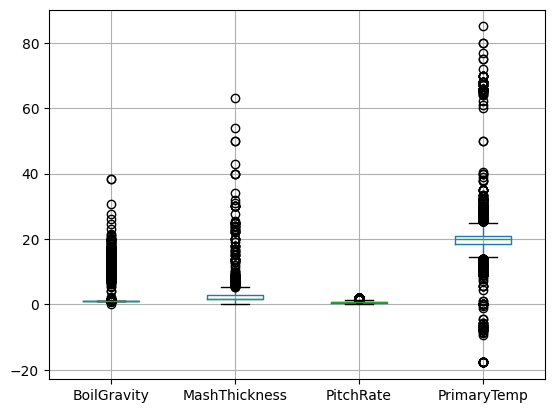

In [17]:
import matplotlib.pyplot as plt
concatenado.boxplot(column= ['BoilGravity', 'MashThickness', 'PitchRate', 'PrimaryTemp' ])
plt.show()

array([[<Axes: title={'center': 'BoilGravity'}>,
        <Axes: title={'center': 'MashThickness'}>],
       [<Axes: title={'center': 'PitchRate'}>,
        <Axes: title={'center': 'PrimaryTemp'}>]], dtype=object)

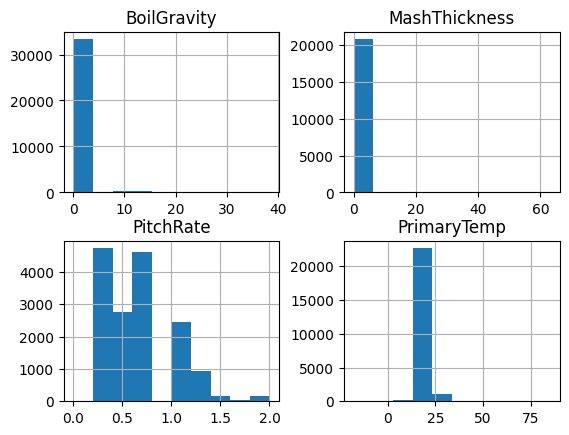

In [18]:
concatenado.hist(column= ['BoilGravity', 'MashThickness', 'PitchRate', 'PrimaryTemp' ])

In [19]:
concatenado['PitchRate'].fillna(concatenado['PitchRate'].mean(), inplace=True)
concatenado.fillna(concatenado.median(), inplace=True)

<ipython-input-19-9cf2923e4c5f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  concatenado['PitchRate'].fillna(concatenado['PitchRate'].mean(), inplace=True)


In [20]:
dadosfaltantes = concatenado.isnull().sum()
faltantes = (concatenado.isnull().sum() / len(concatenado['StyleID'])) * 100
print(faltantes)


StyleID          0.0
Size(L)          0.0
OG               0.0
FG               0.0
ABV              0.0
IBU              0.0
Color            0.0
BoilSize         0.0
BoilTime         0.0
BoilGravity      0.0
Efficiency       0.0
MashThickness    0.0
SugarScale       0.0
PitchRate        0.0
PrimaryTemp      0.0
All Grain        0.0
BIAB             0.0
Partial Mash     0.0
extract          0.0
dtype: float64


In [21]:
y  = concatenado['StyleID']
x = concatenado.drop('StyleID', axis=1)

In [22]:
def modelosclassificacao(a, b):
  from sklearn.linear_model import LogisticRegression
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.model_selection import StratifiedKFold
  from sklearn.model_selection import cross_val_score
  skfold = StratifiedKFold(n_splits=3)
  x = a
  y = b

  normalizador = MinMaxScaler(feature_range = (0 , 1))
  x_norm = normalizador.fit_transform(x)

  logist = LogisticRegression()
  naive = GaussianNB()
  decision_tree = DecisionTreeClassifier()
  knn = KNeighborsClassifier()
  resul_logist = cross_val_score(logist,x,y,cv = skfold)
  resul_naive = cross_val_score(decision_tree,x,y,cv = skfold)
  resul_decision_tree = cross_val_score(decision_tree,x,y,cv = skfold)
  resul_knn = cross_val_score(knn,x_norm,y,cv= skfold)
  dic_classmodels = {'logística':resul_logist.mean(), 'Naive Bayes':resul_naive.mean(), 'Decision Tree':resul_decision_tree.mean(), 'KNN':resul_knn.mean()}
  melhor_modelo = max(dic_classmodels, key=dic_classmodels.get)
  print('Regressão Logística:',resul_logist.mean(), 'Naive Bayes:',resul_naive.mean(), 'Decision  Tree',resul_decision_tree.mean() ,'KNN:',resul_knn.mean())
  print( 'O melhor modelo foi:',melhor_modelo, 'com o valor',dic_classmodels[melhor_modelo])





In [23]:
modelosclassificacao(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Regressão Logística: 0.447069783197832 Naive Bayes: 0.4711495031616983 Decision  Tree 0.4708954381210479 KNN: 0.47628726287262874
O melhor modelo foi: KNN com o valor 0.47628726287262874


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import GridSearchCV

normalizador = MinMaxScaler(feature_range = (0 , 1))
X_norm = normalizador.fit_transform(x)

valores_K = np.array([3, 5, 7, 9])
calculo_distancia = ['minkowoski', 'chebyshev']
valores_p = np.array([1, 2, 3])
valores_grid = {'n_neighbors':valores_K, 'metric':calculo_distancia, 'p':valores_p}

modelo = KNeighborsClassifier()

gridKNN = GridSearchCV( estimator= modelo, param_grid = valores_grid, cv=3, n_jobs=-1)
gridKNN.fit(X_norm,y)

print ('Melhor acurácia: ', gridKNN.best_score_)
print ('Melhor k: ', gridKNN.best_estimator_.n_neighbors)
print ('Método distância: ', gridKNN.best_estimator_.metric)
print ('Melhor valor p: ', gridKNN.best_estimator_.p)
